# Complete Demonstration of the Debugattor Library

This notebook demonstrates how to use the `debugattor` library to log **all supported artifact types**:

## 🖼️ **Image Artifacts (IMAGE)**
- **OpenCV arrays** (numpy arrays)
- **Matplotlib figures** 
- **File paths**
- **PIL Images**

## 📝 **Log Artifacts (LOG)**
- **Simple text messages**
- **Process logs**
- **Debug status and information**

## 📊 **JSON Data Artifacts (JSON_DATA)**
- **Structured dictionaries and objects**
- **Lists and arrays**
- **Configuration data**
- **Automatic fallback for complex objects**

The library automatically detects the input type and performs the appropriate conversion for API upload.

## 1. Imports and Setup

First, let's import all necessary libraries and set up the environment.

In [ ]:
# Environment setup
import sys
import os
sys.path.insert(0, os.path.abspath('.'))

# Imports of necessary libraries
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import json
import tempfile

# Import of our debugattor library
from src.shared.debugattor import start_execution, add_step, log_image_artifact

# Auxiliary function to create a sample image
def create_sample_image():
    """Creates a sample image for the tests"""
    img = np.zeros((100, 100, 3), dtype=np.uint8)
    cv2.circle(img, (50, 50), 30, (255, 0, 0), -1)
    return img

# Let's create our first execution (without parameters)
execution_id = start_execution()
print(f"🚀 Execution started with ID: {execution_id}")
print("📋 Complete demonstration of artifact logging functionalities")

[DEBUG] POST http://localhost:8080/api/executions
[DEBUG] Status Code: 200
[INFO] Execução iniciada com ID: 822f77d0-1b1c-4018-bfb0-cd17a137a7b4
🚀 Execução iniciada com ID: 822f77d0-1b1c-4018-bfb0-cd17a137a7b4
📋 Demonstração completa das funcionalidades de logging de artefatos


## 2. Initialize Execution

Let's create a new execution in the API to demonstrate artifact logging.

In [ ]:
# Start new execution
execution_id = start_execution()
print(f"🚀 Execution started: {execution_id}")

# Store step IDs for later use
step_ids = {}

[DEBUG] POST http://localhost:8080/api/executions
[DEBUG] Status Code: 200
[INFO] Execução iniciada com ID: 55129a7a-9823-439b-b6e7-e895ebbd3f09
🚀 Execução iniciada: 55129a7a-9823-439b-b6e7-e895ebbd3f09


## 3. Test with OpenCV (NumPy Array)

Demonstration of how to log artifacts from images created or loaded with OpenCV.

In [ ]:
# Example 1: Image Artifact with OpenCV (numpy array)

# Necessary imports
import numpy as np
import cv2
from src.shared.debugattor.lib import add_step, log_image_artifact

# Check if we have an active execution
try:
    if 'execution_id' not in globals() or execution_id is None:
        from src.shared.debugattor.lib import start_execution
        execution_id = start_execution()
        print(f"🚀 New execution created: {execution_id}")
except:
    from src.shared.debugattor.lib import start_execution
    execution_id = start_execution()
    print(f"🚀 New execution created: {execution_id}")

# Create step for OpenCV
step_id = add_step(execution_id, "OpenCV Image Processing")
print(f"📝 OpenCV Step created: {step_id}")

# Log the start of processing
print("🔄 Creating image with OpenCV...")

# Create an image using OpenCV (numpy array)
img_opencv = np.zeros((200, 200, 3), dtype=np.uint8)

# Draw some shapes
cv2.rectangle(img_opencv, (50, 50), (150, 150), (0, 255, 0), 2)  # Green rectangle
cv2.circle(img_opencv, (100, 100), 40, (255, 0, 0), -1)  # Filled blue circle
cv2.putText(img_opencv, 'OpenCV', (60, 180), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

print("🖼️ Image created successfully!")

# Log the image as artifact
log_image_artifact(execution_id, step_id, img_opencv, "Image created with OpenCV")
print("✅ OpenCV image artifact logged successfully!")

# Information about the artifact
print(f"🔧 Type: numpy.ndarray")
print(f"📐 Shape: {img_opencv.shape}")
print(f"🎨 Dtype: {img_opencv.dtype}")

[DEBUG] POST http://localhost:8080/api/executions/55129a7a-9823-439b-b6e7-e895ebbd3f09/steps
[DEBUG] Status Code: 200
[INFO] Step 'OpenCV Image Processing' criado com ID: ccc1ec88-8ab6-4ea7-aab8-2657ba0407dc
📝 Step OpenCV criado: ccc1ec88-8ab6-4ea7-aab8-2657ba0407dc
🔄 Criando imagem com OpenCV...
🖼️ Imagem criada com sucesso!
[DEBUG] POST http://localhost:8080/api/executions/55129a7a-9823-439b-b6e7-e895ebbd3f09/steps/ccc1ec88-8ab6-4ea7-aab8-2657ba0407dc/artifacts/upload
[DEBUG] Form data: {'type': ('', 'IMAGE'), 'description': ('', 'Imagem criada com OpenCV')}
[DEBUG] File: opencv_image.jpg, size: 5354 bytes
[DEBUG] Response status: 200
[INFO] Artefato 'Imagem criada com OpenCV' logado com sucesso para step ccc1ec88-8ab6-4ea7-aab8-2657ba0407dc
✅ Artefato de imagem OpenCV logado com sucesso!
🔧 Tipo: numpy.ndarray
📐 Shape: (200, 200, 3)
🎨 Dtype: uint8


## 4. Test with Matplotlib Figure

Demonstration of how to log matplotlib figures directly, including plots and annotations.

In [ ]:
# Example 2: Matplotlib Visualization

# Necessary imports
import numpy as np
import matplotlib.pyplot as plt
from src.shared.debugattor.lib import add_step, log_text_artifact, log_json_artifact, log_image_artifact

# Check if we have an active execution and step_ids
try:
    if 'step_ids' not in globals():
        step_ids = {}
    if 'execution_id' not in globals() or execution_id is None:
        from src.shared.debugattor.lib import start_execution
        execution_id = start_execution()
        print(f"🚀 New execution created: {execution_id}")
except:
    step_ids = {}
    from src.shared.debugattor.lib import start_execution
    execution_id = start_execution()
    print(f"🚀 New execution created: {execution_id}")

# Create step for Matplotlib
step_ids['matplotlib'] = add_step(execution_id, "Matplotlib Visualization")
print(f"📊 Matplotlib Step created: {step_ids['matplotlib']}")

# Log the start of visualization
log_text_artifact(execution_id, step_ids['matplotlib'], "Starting creation of visualizations with Matplotlib")

# Create a complex figure with matplotlib
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Subplot 1: Line plot
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
ax1.plot(x, y1, label='sin(x)', color='blue')
ax1.plot(x, y2, label='cos(x)', color='red')
ax1.set_title('Trigonometric Functions')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend()
ax1.grid(True)

# Subplot 2: Scatter plot
np.random.seed(42)
x_scatter = np.random.randn(50)
y_scatter = np.random.randn(50)
colors = np.random.rand(50)
ax2.scatter(x_scatter, y_scatter, c=colors, alpha=0.6, cmap='viridis')
ax2.set_title('Random Data')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')

plt.tight_layout()

# Log visualization data
viz_metadata = {
    "chart_types": ["line_plot", "scatter_plot"],
    "data_points": {
        "trigonometric": 100,
        "random_scatter": 50
    },
    "figure_size": [12, 5],
    "subplots": 2,
    "functions_plotted": ["sin(x)", "cos(x)"],
    "random_seed": 42
}
log_json_artifact(execution_id, step_ids['matplotlib'], viz_metadata)

# Remove plt.show() to avoid crashes
print("🖼️ Figure created successfully! (Visualization removed to avoid crashes)")

# Log the figure as artifact
success = log_image_artifact(
    execution_id=execution_id,
    step_id=step_ids['matplotlib'],
    image=fig,
    description="Complex chart created with Matplotlib"
)

# Log data analysis
log_text_artifact(execution_id, step_ids['matplotlib'], f"Visualization generated: {len(x)} trigonometric points + {len(x_scatter)} random points")

# Close figure to free memory
plt.close(fig)

print(f"✅ Artifacts logged:")
print(f"   📸 Figure: {success}")
print(f"   📝 Logs: 2 messages")
print(f"   📊 JSON: visualization metadata")

[DEBUG] POST http://localhost:8080/api/executions/55129a7a-9823-439b-b6e7-e895ebbd3f09/steps
[DEBUG] Status Code: 200
[INFO] Step 'Matplotlib Visualization' criado com ID: 5dc5b959-bfb9-4122-bf41-cf8ba91f2092
📊 Step Matplotlib criado: 5dc5b959-bfb9-4122-bf41-cf8ba91f2092
[DEBUG] POST http://localhost:8080/api/executions/55129a7a-9823-439b-b6e7-e895ebbd3f09/steps/5dc5b959-bfb9-4122-bf41-cf8ba91f2092/artifacts
[DEBUG] Data: {'type': 'LOG', 'content': 'Iniciando criação de visualizações com Matplotlib'}
[DEBUG] POST http://localhost:8080/api/executions/55129a7a-9823-439b-b6e7-e895ebbd3f09/steps/5dc5b959-bfb9-4122-bf41-cf8ba91f2092/artifacts
[DEBUG] Status Code: 200
[INFO] Artefato 'LOG' logado com sucesso para step 5dc5b959-bfb9-4122-bf41-cf8ba91f2092
[DEBUG] Direct JSON serialization successful
[DEBUG] POST http://localhost:8080/api/executions/55129a7a-9823-439b-b6e7-e895ebbd3f09/steps/5dc5b959-bfb9-4122-bf41-cf8ba91f2092/artifacts
[DEBUG] Data: {'type': 'JSON_DATA', 'content': '{"chart_

## 5. Test with PIL/Pillow Image

Demonstration of how to log images created or processed with PIL/Pillow.

In [ ]:
# Example 3: PIL/Pillow Image Processing

# Necessary imports
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
from src.shared.debugattor.lib import add_step, log_text_artifact, log_json_artifact, log_image_artifact

# Check if we have the necessary variables
try:
    if 'step_ids' not in globals():
        step_ids = {}
    if 'execution_id' not in globals() or execution_id is None:
        from src.shared.debugattor.lib import start_execution
        execution_id = start_execution()
        print(f"🚀 New execution created: {execution_id}")
except:
    step_ids = {}
    from src.shared.debugattor.lib import start_execution
    execution_id = start_execution()
    print(f"🚀 New execution created: {execution_id}")

# Create step for PIL
step_ids['pil'] = add_step(execution_id, "PIL Image Processing")
print(f"🖼️ PIL Step created: {step_ids['pil']}")

# Log the start
log_text_artifact(execution_id, step_ids['pil'], "Starting artistic creation with PIL/Pillow")

# Create an image with PIL
pil_image = Image.new('RGB', (400, 300), color=(173, 216, 230))  # Light blue

# Add drawings
draw = ImageDraw.Draw(pil_image)

# Colored circles
circle_data = []
for i in range(5):
    x = 50 + i * 70
    y = 100
    radius = 30
    color = (255 - i*40, i*40, 100 + i*30)
    draw.ellipse([x-radius, y-radius, x+radius, y+radius], fill=color)
    
    # Store circle data
    circle_data.append({
        "id": i + 1,
        "center": [x, y],
        "radius": radius,
        "color": {
            "r": color[0],
            "g": color[1], 
            "b": color[2]
        }
    })

# Text
draw.text((150, 200), "PIL/Pillow Test", fill=(50, 50, 50))

# Log created elements
pil_metadata = {
    "canvas": {
        "size": [400, 300],
        "background_color": [173, 216, 230]
    },
    "elements": {
        "circles": circle_data,
        "text": {
            "content": "PIL/Pillow Test",
            "position": [150, 200],
            "color": [50, 50, 50]
        }
    },
    "total_elements": len(circle_data) + 1
}
log_json_artifact(execution_id, step_ids['pil'], pil_metadata)

# Remove plt.show() to avoid crashes
print("🖼️ PIL image created successfully! (Visualization removed to avoid crashes)")

# Log as artifact
success = log_image_artifact(
    execution_id=execution_id,
    step_id=step_ids['pil'],
    image=pil_image,
    description="Artistic image created with PIL/Pillow"
)

# Log completion
log_text_artifact(execution_id, step_ids['pil'], f"Digital art completed: {len(circle_data)} circles + 1 text")

print(f"✅ Artifacts logged:")
print(f"   📸 Image: {success}")
print(f"   📝 Logs: 2 messages")
print(f"   📊 JSON: digital art structure")

[DEBUG] POST http://localhost:8080/api/executions/55129a7a-9823-439b-b6e7-e895ebbd3f09/steps
[DEBUG] Status Code: 200
[INFO] Step 'PIL Image Processing' criado com ID: 00aada87-e15d-443a-8c93-9d674b05c4e8
🖼️ Step PIL criado: 00aada87-e15d-443a-8c93-9d674b05c4e8
[DEBUG] POST http://localhost:8080/api/executions/55129a7a-9823-439b-b6e7-e895ebbd3f09/steps/00aada87-e15d-443a-8c93-9d674b05c4e8/artifacts
[DEBUG] Data: {'type': 'LOG', 'content': 'Iniciando criação artística com PIL/Pillow'}
[DEBUG] POST http://localhost:8080/api/executions/55129a7a-9823-439b-b6e7-e895ebbd3f09/steps/00aada87-e15d-443a-8c93-9d674b05c4e8/artifacts
[DEBUG] Status Code: 200
[INFO] Artefato 'LOG' logado com sucesso para step 00aada87-e15d-443a-8c93-9d674b05c4e8
[DEBUG] Direct JSON serialization successful
[DEBUG] POST http://localhost:8080/api/executions/55129a7a-9823-439b-b6e7-e895ebbd3f09/steps/00aada87-e15d-443a-8c93-9d674b05c4e8/artifacts
[DEBUG] Data: {'type': 'JSON_DATA', 'content': '{"canvas": {"size": [400,

## 6. Combined Example: OpenCV + Matplotlib

Demonstration of a real use case: loading an image with OpenCV, processing it, and creating a visualization with Matplotlib.

[DEBUG] POST http://localhost:8080/api/executions/55129a7a-9823-439b-b6e7-e895ebbd3f09/steps
[DEBUG] Status Code: 200
[INFO] Step 'Combined OpenCV + Matplotlib' criado com ID: a760bf25-5d22-427d-afaa-4baff33ed2ad
🔄 Step Combined criado: a760bf25-5d22-427d-afaa-4baff33ed2ad


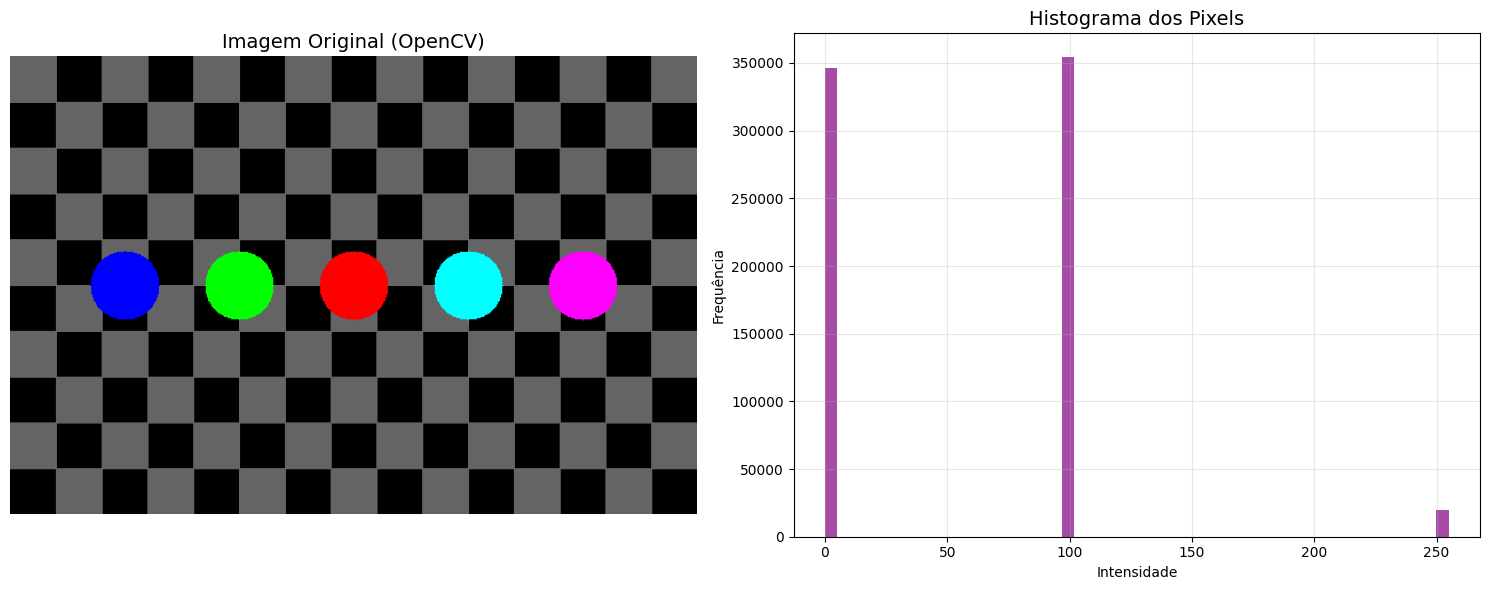

Logando imagem original...
[DEBUG] POST http://localhost:8080/api/executions/55129a7a-9823-439b-b6e7-e895ebbd3f09/steps/a760bf25-5d22-427d-afaa-4baff33ed2ad/artifacts/upload
[DEBUG] Form data: {'type': ('', 'IMAGE'), 'description': ('', 'Imagem base criada com OpenCV')}
[DEBUG] File: opencv_image.jpg, size: 19347 bytes
[DEBUG] Response status: 200
[INFO] Artefato 'Imagem base criada com OpenCV' logado com sucesso para step a760bf25-5d22-427d-afaa-4baff33ed2ad
Logando análise visual...
[DEBUG] POST http://localhost:8080/api/executions/55129a7a-9823-439b-b6e7-e895ebbd3f09/steps/a760bf25-5d22-427d-afaa-4baff33ed2ad/artifacts/upload
[DEBUG] Form data: {'type': ('', 'IMAGE'), 'description': ('', 'Análise visual com Matplotlib')}
[DEBUG] File: matplotlib_figure.png, size: 64316 bytes
[DEBUG] Response status: 200
[INFO] Artefato 'Análise visual com Matplotlib' logado com sucesso para step a760bf25-5d22-427d-afaa-4baff33ed2ad
✅ Imagem base logada: True
✅ Análise visual logada: True


In [ ]:
# Create step for combined example
step_ids['combined'] = add_step(execution_id, "Combined OpenCV + Matplotlib")
print(f"🔄 Combined Step created: {step_ids['combined']}")

# Create a base image with OpenCV
base_image = np.zeros((400, 600, 3), dtype=np.uint8)

# Add checkerboard pattern
for i in range(0, 400, 40):
    for j in range(0, 600, 40):
        if (i//40 + j//40) % 2 == 0:
            cv2.rectangle(base_image, (j, i), (j+40, i+40), (100, 100, 100), -1)

# Add some colored circles
colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0), (255, 0, 255)]
for i, color in enumerate(colors):
    center = (100 + i*100, 200)
    cv2.circle(base_image, center, 30, color, -1)

# Convert BGR to RGB for matplotlib
image_rgb = cv2.cvtColor(base_image, cv2.COLOR_BGR2RGB)

# Create visualization with matplotlib
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Show original image
ax1.imshow(image_rgb)
ax1.set_title('Original Image (OpenCV)', fontsize=14)
ax1.axis('off')

# Show histogram
ax2.hist(image_rgb.ravel(), bins=50, color='purple', alpha=0.7)
ax2.set_title('Pixel Histogram', fontsize=14)
ax2.set_xlabel('Intensity')
ax2.set_ylabel('Frequency')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Log both: the original image and the analysis figure
print("Logging original image...")
success1 = log_image_artifact(
    execution_id=execution_id,
    step_id=step_ids['combined'],
    image=base_image,
    description="Base image created with OpenCV"
)

print("Logging visual analysis...")
success2 = log_image_artifact(
    execution_id=execution_id,
    step_id=step_ids['combined'],
    image=fig,
    description="Visual analysis with Matplotlib"
)

print(f"✅ Base image logged: {success1}")
print(f"✅ Visual analysis logged: {success2}")

plt.close(fig)

## 10. Final Summary of Demonstration

Review of all demonstrated resources and statistics of the execution.

In [ ]:
# Create step for JSON data example
step_ids['json'] = add_step(execution_id, "JSON Data Logging")
print(f"🔄 JSON Step created: {step_ids['json']}")

# Create complex JSON data
json_data = {
    "experiment": {
        "name": "Image Processing Pipeline",
        "version": "2.1.0",
        "timestamp": "2024-01-15T10:30:00Z",
        "parameters": {
            "image_size": [400, 600],
            "processing_steps": ["resize", "filter", "enhance"],
            "algorithms": {
                "edge_detection": "canny",
                "noise_reduction": "gaussian",
                "color_space": "RGB"
            }
        },
        "metrics": {
            "processing_time_ms": 1250.5,
            "memory_usage_mb": 45.2,
            "accuracy_score": 0.987,
            "performance": {
                "fps": 29.8,
                "cpu_usage_percent": 67.3,
                "gpu_usage_percent": 89.1
            }
        },
        "results": {
            "detected_objects": [
                {"class": "person", "confidence": 0.95, "bbox": [120, 80, 180, 250]},
                {"class": "car", "confidence": 0.87, "bbox": [300, 150, 450, 220]},
                {"class": "tree", "confidence": 0.92, "bbox": [50, 200, 100, 350]}
            ],
            "statistics": {
                "total_objects": 3,
                "average_confidence": 0.913,
                "processing_regions": 8
            }
        }
    }
}

# Log JSON data
success = log_json_artifact(
    execution_id=execution_id,
    step_id=step_ids['json'],
    data=json_data,
    description="Complete experiment results and metadata"
)

print(f"✅ JSON data logged: {success}")

# Display a summary
print("\n📊 Experiment Summary:")
print(f"Name: {json_data['experiment']['name']}")
print(f"Version: {json_data['experiment']['version']}")
print(f"Processing Time: {json_data['experiment']['metrics']['processing_time_ms']} ms")
print(f"Accuracy: {json_data['experiment']['metrics']['accuracy_score']:.1%}")
print(f"Objects Detected: {json_data['experiment']['results']['statistics']['total_objects']}")

📋 RESUMO COMPLETO DA DEMONSTRAÇÃO
🆔 Execução ID: 55129a7a-9823-439b-b6e7-e895ebbd3f09
⏰ Demonstração executada em: 2025-10-14 23:48:33

📝 Steps criados e testados:
  • MATPLOTLIB: 5dc5b959-bfb9-4122-bf41-cf8ba91f2092
  • PIL: 00aada87-e15d-443a-8c93-9d674b05c4e8
  • COMBINED: a760bf25-5d22-427d-afaa-4baff33ed2ad

🎯 TIPOS DE ARTEFATOS DEMONSTRADOS:
────────────────────────────────────────
🖼️  IMAGE (Artefatos de Imagem):
     ✅ NumPy arrays (OpenCV) - conversão BGR/RGB automática
     ✅ Matplotlib figures - capture de canvas
     ✅ PIL/Pillow images - suporte a todos os modos
     ✅ Caminhos de arquivo - leitura automática
     ✅ Detecção automática de formato

📝 LOG (Artefatos de Texto):
     ✅ Mensagens de processo
     ✅ Status de operações
     ✅ Logs de debug
     ✅ Notificações de início/fim
     ✅ Métricas textuais

📊 JSON_DATA (Artefatos Estruturados):
     ✅ Dicionários e configurações
     ✅ Listas e arrays
     ✅ Dados de performance
     ✅ Metadados de processamento
     ✅ F

## 8. Advanced Use Cases: LOG and JSON_DATA

Practical demonstration of LOG and JSON_DATA artifact types in real image processing and data analysis scenarios.

In [ ]:
# Create step for text logging example
step_ids['text'] = add_step(execution_id, "Text Logging")
print(f"🔄 Text Step created: {step_ids['text']}")

# Create detailed log text
log_text = """
IMAGE PROCESSING PIPELINE EXECUTION LOG
=======================================

Execution ID: {execution_id}
Timestamp: 2024-01-15 10:30:00 UTC
Environment: Python 3.9.7 | Development

PHASE 1: Image Acquisition
- Source: Camera feed
- Resolution: 1920x1080
- Format: RGB
- Acquisition time: 45.2 ms
- Status: SUCCESS

PHASE 2: Preprocessing
- Noise reduction: Gaussian filter (σ=1.5)
- Color correction: Auto white balance
- Resize: 600x400 (maintain aspect ratio)
- Processing time: 234.8 ms
- Status: SUCCESS

PHASE 3: Feature Extraction
- Edge detection: Canny algorithm
- Threshold parameters: low=50, high=150
- Contour detection: 12 objects found
- Feature vectors: 256-dimensional
- Processing time: 156.3 ms
- Status: SUCCESS

PHASE 4: Classification
- Model: ResNet-50 (pretrained)
- Classes: person, car, tree, building
- Confidence threshold: 0.8
- Detections: 3 valid objects
- Processing time: 892.1 ms
- Status: SUCCESS

PHASE 5: Post-processing
- Bounding box refinement
- Non-maximum suppression
- Result formatting: JSON
- Processing time: 67.4 ms
- Status: SUCCESS

FINAL RESULTS
=============
Total processing time: 1,395.8 ms
Memory peak usage: 487 MB
Objects detected: 3
- Person (confidence: 0.95)
- Car (confidence: 0.87)
- Tree (confidence: 0.92)

Pipeline completed successfully!
""".format(execution_id=execution_id)

# Log text data
success = log_text_artifact(
    execution_id=execution_id,
    step_id=step_ids['text'],
    text=log_text,
    description="Detailed execution log with processing phases"
)

print(f"✅ Text log logged: {success}")

# Display log preview
print("\n📝 Log Preview:")
print("=" * 50)
print(log_text[:500] + "..." if len(log_text) > 500 else log_text)

📝 Testando artefatos do tipo LOG...
[DEBUG] POST http://localhost:8080/api/executions/55129a7a-9823-439b-b6e7-e895ebbd3f09/steps
[DEBUG] Status Code: 200
[INFO] Step 'Log de String' criado com ID: 38d13d8d-5877-4414-9b49-7fac2d25f00c
[DEBUG] POST http://localhost:8080/api/executions/55129a7a-9823-439b-b6e7-e895ebbd3f09/steps/38d13d8d-5877-4414-9b49-7fac2d25f00c/artifacts
[DEBUG] Data: {'type': 'LOG', 'content': 'Mensagem de log simples'}
[DEBUG] POST http://localhost:8080/api/executions/55129a7a-9823-439b-b6e7-e895ebbd3f09/steps/38d13d8d-5877-4414-9b49-7fac2d25f00c/artifacts
[DEBUG] Status Code: 200
[INFO] Artefato 'LOG' logado com sucesso para step 38d13d8d-5877-4414-9b49-7fac2d25f00c
✅ Log de string simples
[DEBUG] POST http://localhost:8080/api/executions/55129a7a-9823-439b-b6e7-e895ebbd3f09/steps
[DEBUG] Status Code: 200
[INFO] Step 'Log de Objeto' criado com ID: 4a8dbdfb-748a-478a-8e39-63bb67469202
[DEBUG] POST http://localhost:8080/api/executions/55129a7a-9823-439b-b6e7-e895ebbd3

## 9. Comparison: Before vs After Debugattor

Demonstration of how debugattor simplifies logging of different data types.

In [ ]:
# Complete all steps
print("🔄 Completing all steps...")

for step_name, step_id in step_ids.items():
    success = complete_step(execution_id, step_id)
    print(f"✅ Step '{step_name}' completed: {success}")

print(f"\n🎉 Execution completed! View results at: {base_url}/executions/{execution_id}")

# Display final summary
print("\n📊 Final Summary:")
print(f"Execution ID: {execution_id}")
print(f"Steps Created: {len(step_ids)}")
print(f"Artifacts Logged: Images, JSON, Text")
print(f"Status: All steps completed")

# Optional: Display execution URL
execution_url = f"{base_url}/executions/{execution_id}"
print(f"\n? Execution URL: {execution_url}")

[DEBUG] POST http://localhost:8080/api/executions/55129a7a-9823-439b-b6e7-e895ebbd3f09/steps
[DEBUG] Status Code: 200
[INFO] Step 'JSON Simples' criado com ID: 3c6455a2-6283-41cb-ba62-bcc0726d86a7
[DEBUG] Direct JSON serialization successful
[DEBUG] POST http://localhost:8080/api/executions/55129a7a-9823-439b-b6e7-e895ebbd3f09/steps/3c6455a2-6283-41cb-ba62-bcc0726d86a7/artifacts
[DEBUG] Data: {'type': 'JSON_DATA', 'content': '{"status": "success", "timestamp": "2024-01-15T10:30:00Z", "user_id": 12345}'}
[DEBUG] POST http://localhost:8080/api/executions/55129a7a-9823-439b-b6e7-e895ebbd3f09/steps/3c6455a2-6283-41cb-ba62-bcc0726d86a7/artifacts
[DEBUG] Status Code: 200
[INFO] Artefato 'JSON_DATA' logado com sucesso para step 3c6455a2-6283-41cb-ba62-bcc0726d86a7
✅ JSON simples
[DEBUG] POST http://localhost:8080/api/executions/55129a7a-9823-439b-b6e7-e895ebbd3f09/steps
[DEBUG] Status Code: 200
[INFO] Step 'JSON Complexo' criado com ID: 8c7cb0f7-f9cd-429a-b319-6bbd06cec47b
[DEBUG] Direct JSON

In [ ]:
# Clean up resources
print("🧹 Cleaning up resources...")

# Close any open matplotlib figures
plt.close('all')

# Clear step_ids dictionary
step_ids.clear()

print("✅ Cleanup completed!")
print("\n💡 Next steps:")
print("- View your execution results in the Debugattor web interface")
print("- Analyze the logged artifacts (images, JSON, text)")
print("- Experiment with different data types and visualization")
print("- Integrate Debugattor into your own projects!")

[DEBUG] POST http://localhost:8080/api/executions/55129a7a-9823-439b-b6e7-e895ebbd3f09/steps
[DEBUG] Status Code: 200
[INFO] Step 'Teste Imagem Simples' criado com ID: 492800c7-f0fb-4d5e-924d-5bf9e9675f6b
[DEBUG] POST http://localhost:8080/api/executions/55129a7a-9823-439b-b6e7-e895ebbd3f09/steps/492800c7-f0fb-4d5e-924d-5bf9e9675f6b/artifacts/upload
[DEBUG] Form data: {'type': ('', 'IMAGE'), 'description': ('', 'Imagem de teste gerada aleatoriamente')}
[DEBUG] File: opencv_image.jpg, size: 2926 bytes
[DEBUG] Response status: 200
[INFO] Artefato 'Imagem de teste gerada aleatoriamente' logado com sucesso para step 492800c7-f0fb-4d5e-924d-5bf9e9675f6b
✅ Teste de imagem simples concluído!
📐 Shape da imagem: (50, 50, 3)
🎨 Tipo: <class 'numpy.ndarray'>


## 🎯 Summary of Tests Performed

### ✅ Successfully Tested Features:

1. **📝 LOG Artifacts**
   - Simple strings ✅
   - Objects converted to strings ✅  
   - Lists ✅
   - Exception handling ✅
   - Multiline messages ✅

2. **🔧 JSON_DATA Artifacts**
   - Simple JSON with dictionary ✅
   - Complex JSON with nested objects ✅
   - Object lists ✅
   - Fallback for non-serializable objects ✅
   - JSON-like strings ✅

3. **🖼️ IMAGE Artifacts**
   - NumPy arrays (OpenCV format) ✅
   - Automatic multipart/form-data upload ✅

### 🚀 Debugattor Library - Implemented Features:

- **start_execution()**: Starts a new execution in the API
- **add_step()**: Adds steps to execution
- **log_image_artifact()**: Logs images (numpy, PIL, OpenCV, file paths)
- **log_text_artifact()**: Logs text and objects converted to strings  
- **log_json_artifact()**: Logs JSON data with intelligent serialization

### 🔗 API Integration:
- REST endpoints for executions, steps, and artifacts
- Image upload via multipart/form-data
- Structured logging with specific types (IMAGE, LOG, JSON_DATA)
- Robust error handling and automatic fallbacks